In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('finail_1.csv')

In [3]:
data.head()

کد ملک       تاریخ                                        آدرس  زیربنا_x  \
0  10416222  2024-08-14                          شهران بلوار كوهسار        75   
1  10416222  2024-08-14                          شهران بلوار كوهسار        75   
2  10335838  2024-08-14                         تهران نو فلكه چایچی        70   
3  10416220  2024-08-14  انتهای همت غرب مروارید شهر خ شهید اردستانی        89   
4  10267636  2024-08-14                        نیرو هوایی خ 30 متری        70   

   سن بنا  قیمت واحد     قیمت کل  tabaghe      code          addres  ...  \
0       5  104000000  7800000000      2.0  10416222          شهران   ...   
1       5  104000000  7800000000      2.0  10416222          شهران   ...   
2      20   74285000  5200000000      3.0  10335838       تهران نو   ...   
3       0   78651000  7000000000     13.0  10416220   شهرک راه آهن   ...   
4      22   77142000  5400000000      3.0  10267636     نیرو هوایی   ...   

    کفپوش  OPEN  پارکینگ  انباری  بالکن  غربی  شرقی  شمالی  جنوبی     kinde  
0   پارکت     1        0       1      1     0     0      0      1  apatment  
1   پارکت     1        0       1      1     0     0      0      1  apatment  
2  سراميک     1        0       1      1     0     0      0      1  apatment  
3  سراميک     1        0       1      1     1     0      0      0  apatment  
4  سراميک     1        0       1      0     0     0      1      0  apatment  

[5 rows x 33 columns]

In [4]:
data.drop(columns=['زیربنا_x'],inplace=True)

In [5]:
data.drop(columns=['طبقه'],inplace=True)

In [6]:
data.drop(columns=['کد ملک'],inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15588 entries, 0 to 15587
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   تاریخ            15588 non-null  object 
 1   آدرس             15588 non-null  object 
 2   سن بنا           15588 non-null  int64  
 3   قیمت واحد        15588 non-null  int64  
 4   قیمت کل          15588 non-null  int64  
 5   tabaghe          15588 non-null  float64
 6   code             15588 non-null  int64  
 7   addres           15298 non-null  object 
 8   dastresi         3870 non-null   float64
 9   tejary           3870 non-null   float64
 10  darmany          3870 non-null   float64
 11  farhangi_honary  3870 non-null   float64
 12  tafrihy          3870 non-null   float64
 13  rest             3870 non-null   float64
 14  parks            3870 non-null   float64
 15  زیربنا_y         15588 non-null  int64  
 16  خواب             15588 non-null  int64  
 17  تلفن        

In [68]:
corr=data.corr()

In [8]:
import seaborn as sns

In [70]:
corr['قیمت کل']

سن بنا            -0.183855
قیمت واحد          0.786768
قیمت کل            1.000000
tabaghe            0.117063
code              -0.052783
dastresi          -0.156064
tejary             0.027718
darmany           -0.151040
farhangi_honary    0.238087
tafrihy           -0.126595
rest               0.006865
parks              0.048970
زیربنا_y           0.799646
خواب               0.460753
تلفن               0.029203
OPEN               0.016316
پارکینگ                 NaN
انباری             0.121687
بالکن              0.162105
غربی               0.021023
شرقی               0.008640
شمالی              0.054817
جنوبی              0.035914
Name: قیمت کل, dtype: float64

<AxesSubplot:>

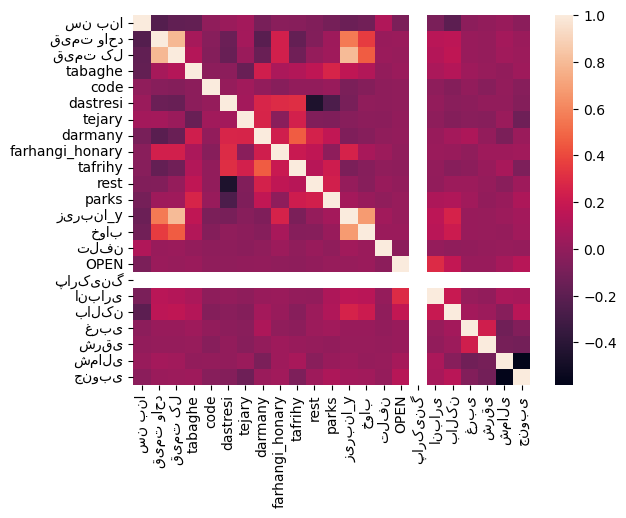

In [10]:
sns.heatmap(corr)

In [9]:
data2=pd.read_csv('data.csv')
data2=data2[['region','district']]

In [11]:
data['region']=data['addres']

In [17]:
data3=pd.merge(data,data2,on='region',how='left')

In [ ]:
a=data['region'][0]

In [65]:
a.strip(" ")

'شهران'

In [13]:
import numpy as np

In [14]:
def stip_str(address):
    if type(address) == float:
        return address
    a=address.strip(" ")
    return a

In [15]:
data['region']=data['region'].apply(stip_str)

In [16]:
data['region'][0]

'شهران'

In [20]:
data3['district'].isna().sum()

9518

In [17]:
data4=pd.read_csv('tehran_addres.csv')
data4['region']=data4['0']
data4.drop(columns=['0'],inplace=True)

In [28]:
data2.head(1)


region  zone
0  استاد معین     9

In [27]:
data2['zone']=data2['district']
data2.drop(columns=['district'],inplace=True)

In [29]:
data4=pd.concat([data2,data4])

In [32]:
data5=pd.merge(data,data4,on='region',how='left')

In [78]:
data5['zone'].isna().sum()

5981

In [40]:
data5.to_csv('finail_3.csv',index=False)

In [39]:
data5[data5['zone'].isna()]

تاریخ                                  آدرس  سن بنا  قیمت واحد  \
809       2024-08-14              آرژانتین بیهقی خ شانزدهم      20   95000000   
810       2024-08-14     اشرفی اصفهانی باغ فیض امیرابراهیم      15   79047000   
972       2024-08-14                   هفده شهریور خ سرحدی      12   50704000   
2682      2024-08-14               هفده شهریور شمالی خ صفا       2   75000000   
13968     2024-08-14          مفتح شمالی نرسیده به خ گلزار      30   69444000   
...              ...                                   ...     ...        ...   
11187953  2024-08-15                        شریعتی خ كشانی      11  137750000   
11188406  2024-08-15  شریعتی پائین تراز خ ملك روبروی میثاق       5   90000000   
11188407  2024-08-15                شریعتی بالاتر از مطهری      16  112030000   
11188408  2024-08-15           شریعتی نرسیده به سه طالقانی       6  120000000   
11189156  2024-08-15            ولیعصر نرسیده به پارك ساعی      30  135590000   

              قیمت کل  tabaghe      code  \
809       16815000000      2.0  10298234   
810        6640000000      3.0  10416219   
972        3600000000      1.0  10351556   
2682       5400000000      2.0   3906324   
13968      7500000000      2.0  10268697   
...               ...      ...       ...   
11187953  13500000000      1.0  10300723   
11188406   7200000000      1.0  10254129   
11188407  12100000000      2.0  10207017   
11188408  15720000000      5.0  10276443   
11189156  16000000000      4.0   3804062   

                                                   addres  dastresi  tejary  \
809                                       میدان آرژانتین        NaN     NaN   
810        اشرفی اصفهانی(از بلوار سیمون بولیوار تا حکیم)        NaN     NaN   
972                                             شاد آباد        NaN     NaN   
2682                                     خیابان مازندران        NaN     NaN   
13968                          مفتح(از بهشتی تا هفت تیر)        NaN     NaN   
...                                                   ...       ...     ...   
11187953                                            دولت        4.0     2.0   
11188406             شریعتی(از بهار شیراز تا پیچ شمیران)        NaN     NaN   
11188407                     شریعتی( ازهمت تا بهارشیراز)        NaN     NaN   
11188408             شریعتی(از بهار شیراز تا پیچ شمیران)        NaN     NaN   
11189156                ولیعصر( از همت تا خیابان انقلاب)        NaN     NaN   

          ...  پارکینگ  انباری  بالکن  غربی  شرقی  شمالی  جنوبی     kinde  \
809       ...        0       1      1     0     0      0      1  apatment   
810       ...        0       1      1     0     0      0      1  apatment   
972       ...        0       1      0     0     0      0      1  apatment   
2682      ...        0       1      1     0     0      0      1  apatment   
13968     ...        0       1      0     0     0      0      0  apatment   
...       ...      ...     ...    ...   ...   ...    ...    ...       ...   
11187953  ...        0       1      1     0     0      0      1  apatment   
11188406  ...        0       1      1     0     0      0      1  apatment   
11188407  ...        0       1      1     0     0      1      0  apatment   
11188408  ...        0       1      1     0     0      0      1  apatment   
11189156  ...        0       1      1     1     1      0      0  apatment   

                                                 region zone  
809                                      میدان آرژانتین  NaN  
810       اشرفی اصفهانی(از بلوار سیمون بولیوار تا حکیم)  NaN  
972                                            شاد آباد  NaN  
2682                                    خیابان مازندران  NaN  
13968                         مفتح(از بهشتی تا هفت تیر)  NaN  
...                                                 ...  ...  
11187953                                           دولت  NaN  
11188406            شریعتی(از بهار شیراز تا پیچ شمیران)  NaN  
11188407                    شریعتی( ازهمت تا بهارشیراز)  NaN  
11188408 